In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.patches import cv2_imshow
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import os
import numpy
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
def read_images(path, image_size):
  names = []
  training_images, training_labels = [], []
  label = 0

  # dirname - nome da pasta principal do drive
  # subdirname - nome da pasta dentro da pasta principal do drive
  # filenames - nome das imagens

  for dirname, subdirnames, filenames in os.walk(path):
    for subdirname in subdirnames:
        names.append(subdirname)
        subject_path = os.path.join(dirname, subdirname)
        for filename in os.listdir(subject_path):
          img = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)
          if img is None:
            # The file cannot be loaded as an image.
            # Skip it.
            continue
          img = cv2.resize(img, image_size)
          training_images.append(img)
          training_labels.append(label)
        label += 1
  training_images = numpy.asarray(training_images, numpy.uint8)
  training_labels = numpy.asarray(training_labels, numpy.int32)
  return names, training_images, training_labels

In [4]:
path_to_training_images = '/content/gdrive/MyDrive/Photos/Pessoas'
training_image_size = (470, 620)
names, training_images, training_labels = read_images(path_to_training_images, training_image_size)

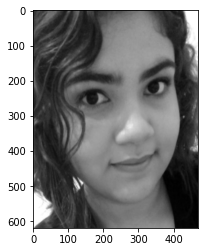

In [5]:
plt.imshow(training_images[0], cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [7]:
output_folder = '/content/gdrive/MyDrive/Photos/Recortes'
if not os.path.exists(output_folder):
  os.makedirs(output_folder)
for i in range(training_labels.size): 
  # initialze bounding box to empty
  bbox = ''
  # convert JS response to OpenCV Image
  img = training_images[i]

  # get face region coordinates
  faces = face_cascade.detectMultiScale(img, 1.3, 5, minSize=(120, 120))

  # get face bounding box for overlay
  for (x,y,w,h) in faces:
    roi_gray = img[y:y+h, x:x+w]
    face_filename = '%s/%d.jpg' % (output_folder, i)
    cv2.imwrite(face_filename, roi_gray)